# PyTorch

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

## Basic

In [2]:
x = torch.empty(5, 3)
x = torch.rand(5, 3)
x = torch.zeros(5, 4, dtype=torch.long)
x = torch.tensor([5.5, 3])
x = x.new_ones(5, 3, dtype=torch.double)
x = torch.randn_like(x, dtype=torch.float)

print(x)
print(x.size())

y = torch.rand(5, 3)
print(x + y)
print(torch.add(x, y))

result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

y.add(x)
print(y)

print(x[:, 1])

x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # -1 infered from other dimensions
print(x.size(), y.size(), z.size())

x = torch.randn(1)
print(x)
print(x.item())

a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)

import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

tensor([[-1.7132,  0.5576, -0.0868],
        [-0.5943,  0.1071,  0.5855],
        [-0.9692, -0.5412,  1.6587],
        [-0.4221,  0.1357,  0.7657],
        [-1.6714,  0.3379, -1.2586]])
torch.Size([5, 3])
tensor([[-1.2666,  0.8775,  0.8212],
        [-0.2825,  0.6223,  0.6548],
        [-0.1879, -0.3393,  1.7768],
        [ 0.3550,  0.8210,  0.8221],
        [-1.0058,  0.5948, -0.6520]])
tensor([[-1.2666,  0.8775,  0.8212],
        [-0.2825,  0.6223,  0.6548],
        [-0.1879, -0.3393,  1.7768],
        [ 0.3550,  0.8210,  0.8221],
        [-1.0058,  0.5948, -0.6520]])
tensor([[-1.2666,  0.8775,  0.8212],
        [-0.2825,  0.6223,  0.6548],
        [-0.1879, -0.3393,  1.7768],
        [ 0.3550,  0.8210,  0.8221],
        [-1.0058,  0.5948, -0.6520]])
tensor([[0.4466, 0.3199, 0.9079],
        [0.3118, 0.5152, 0.0693],
        [0.7813, 0.2019, 0.1181],
        [0.7772, 0.6852, 0.0564],
        [0.6656, 0.2569, 0.6067]])
tensor([ 0.5576,  0.1071, -0.5412,  0.1357,  0.3379])
torch.Size([

## Autograd

### Tensor

In [3]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [4]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [5]:
print(y.grad_fn)

In [6]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [7]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### Gradients

In [8]:
out.backward()

In [9]:
print(x.grad) # grad out in respect with x (d_out/d_xi)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [10]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 474.3667, 1552.9734,  391.4391], grad_fn=<MulBackward0>)


In [11]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad) # gradient of y in respect to x ? why v ?

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [12]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## Neural Networks

### Model

In [13]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 image channel
        # 6 output channels, 5x5 sqyare convolution channel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # first is batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [14]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [15]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0030,  0.0200, -0.0504, -0.0289, -0.0418, -0.0972,  0.0623, -0.0462,
          0.0406, -0.1195]], grad_fn=<AddmmBackward>)


In [16]:
net.zero_grad()
out.backward(torch.randn(1,10))

### Loss function

In [17]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5206, grad_fn=<MseLossBackward>)


In [18]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

### Backprop

In [19]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0060,  0.0033,  0.0063,  0.0008,  0.0037, -0.0015])


### Update the weights

In [20]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [21]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

# training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## Training a Classifier

In [23]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5),
                                                   (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data',
                                       train=True,
                                       download=True,
                                       transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                     shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data',
                                      train=False,
                                      download=True,
                                      transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


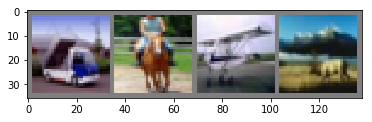

truck horse plane  deer


In [24]:
def imshow(img):
    img = img/ 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))